<a href="https://colab.research.google.com/github/Muhammadatir/colab_notebook_iiit-hub/blob/main/STP_Module_5_Lab_2_Loss_Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
#Regression Lab 2: Loss Functions


## Motivation

The main goal of machine learning tasks is to "learn" something about data we feed to our models. But how does the model actually learn anything? To understand this, we need to first understand what objective functions are.

Mathematically, objective functions are a function whose values we desire to minimize/maximize. In the context of machine learning, the objective is commonly referred to as a **loss function**. Loss functions indicate how well the model is doing on the dataset.

The value of the objective function is simply called **loss**. Our goal is to eventually find the best model parameters that has the least average loss on the data after training.


We are familiar with the idea of **error** from the linear regression lab. RMSE is a common loss function used in machine learning. However, there are many other loss functions employed, depending on what the task is (classification, regression etc.). In this lab, we will take a look at some common loss functions, and understand why they are used where they are.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# interactive visualization

# 1. Regression


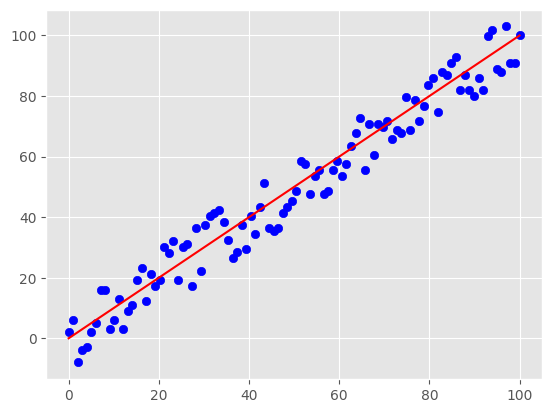

In [ ]:
# initializing random data

np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

plt.plot(x,y_actual,color="red")
plt.scatter(x,y_pred,color="blue")
plt.show()

### Mean Squared Error

As we have seen before, the formula for MSE is

$MSE = \frac{1}{m} \sum_{i=1}^n (y-y_p)^2$

The image below depicts a visualization of what the squared error is.

<img src="https://drive.google.com/uc?export=view&id=12jmqRrrqknIWKhwRpgRIJAErBjkEcyx9" width="350" height="350" align="middle"/>

MSE is also referred to as L2 loss.

Typically, we would want the units of error to be the same as the data, so we use Root Mean Squared Error instead.



In [ ]:
mse = np.mean((y_actual-y_pred)**2)
print("MSE is: {}".format(mse))
print("RMSE is: {}".format(np.sqrt(mse)))

MSE is: 38.68
RMSE is: 6.219324722186485


### Mean Absolute Error

$MAE = \frac{1}{m} \sum_{i=1}^n |y-y_p|$

MAE is also commonly referred to as L1 loss.

In [ ]:
mae = np.mean(np.abs(y_actual-y_pred))
print("MAE is: {}".format(mae))

MAE is: 5.5


MSE penalizes the model for making large errors by squaring the difference. However, this also means that MSE cannot handle outliers well, since they would throw the model off.

On the other hand, MAE is robust to outliers. But, MAE is non-differentiable, making it difficult to perform mathematical operations on it.

Hence, RMSE is most commonly used as a metric for evaluation.

# 2. Classification

Classification tasks involve some data, along with labels assigned to that data. For example, we may have pictures of cats and dogs, and the corresponding labels assigned to those images. We then want to train a model that can predict a label for some input image belonging to either label class (cat or dog).

## The concept of maximum likelihood

Ideally, we would want to obtain a model $\hat{\theta}$ which maximizes the probability of correctly predicting data. Mathematically, the likelihood is:

$ \prod_{i=1}^{N}  \: \hat{\theta_i}^{\theta_i}$

This is because our actual data ($\theta_i$) is either 0 or 1 depending on the label of the data, and our predicted data ($\hat{\theta_i}$) is a probability.

We usually consider the negative log of the likelihood, since log is monotonic and easier to deal with as an optimization problem.

Hence, we have

$MLE = $ arg min $\: - \sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$

\


## Entropy and Cross-Entropy

For some event $x$, we can obtain **information** based on its probability distribution. For example, for some event that occurs with $p=1$, we gain no information. Now, if we flip a coin and see that we obtained heads, we say that we got 1 bit of information.

Thus, the information $I$ of some event $x$ is:

$I = -log_2 \: p(x)$

We say that events with a low probability of occuring give high information, and those with a low probability give low information.

Now, if we have some random variable $X$, its **entropy** is the expected value of the information obtained.

$H(x) = - \sum_{k} p_k \: log \: p_k$

Now, suppose we are trying to correctly predict labels of some data. Let P be the true distribution of the labels, and Q be the predicted distribution of labels.

Cross-Entropy is then defined as:

$H(P,Q) = - \sum_{x} P(x)\: log \: Q(x)$

which is basically the entropy between two probability distributions over the same events.

\


## MLE and Cross-Entropy

So, in the case of classification, the equation for minimization of the cross-entropy between the actual data and the predicted data would be:

arg min $\: -\sum_{i=1}^{N} P(x) \: log \: Q(x)$

$= $ arg min $\: -\sum_{i=1}^{N} \theta_i \: log \: \hat{\theta_i}$


which is exactly the same as what we had obtained for minimizing the negative log likelihood. Hence, the two problems are equivalent.

1/1+e^(-x)

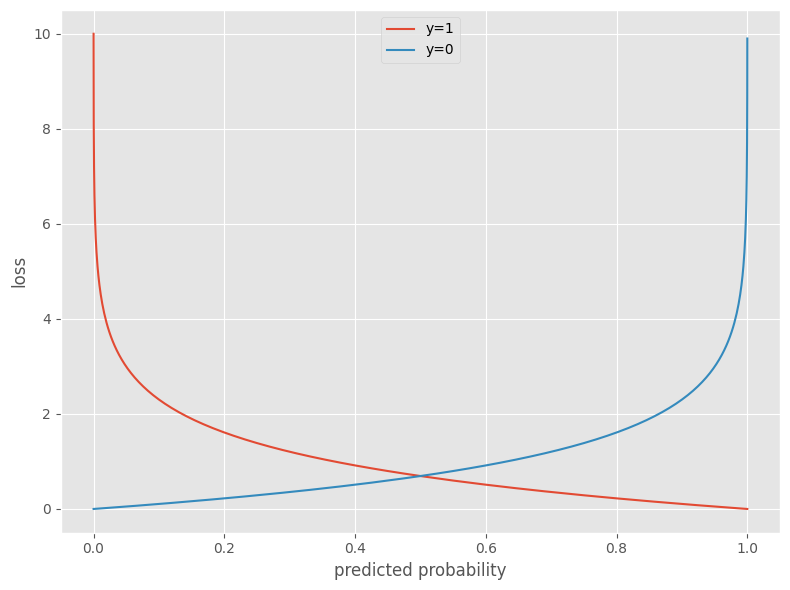

In [ ]:
def sigmoid(z):
  return 1/(1 + np.exp(-z))

def cross_entropy_loss(y_,y):
  if y==1:
    return -np.log(y_)

  return -np.log(1-y_)

z = np.arange(-10, 10, 0.1)
h_z = sigmoid(z)

cost_1 = cross_entropy_loss(h_z, 1)
cost_0 = cross_entropy_loss(h_z, 0)

fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='y=1')
plt.plot(h_z, cost_0, label='y=0')
plt.xlabel('predicted probability')
plt.ylabel('loss')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

## KNN-regression

Till now, we have studied KNN as a classification algorithm, which uses feature similarity and voting to decide the class labels of unseen data.

For regression, we use the same idea: We take the y-values of the k nearest neighbours, and compute their average, which is our predicted y-value. We do this for every x whose value we want to predict.

In the visualization below, we have k=3, and the red dots are the new x-values whose output we want to predict.

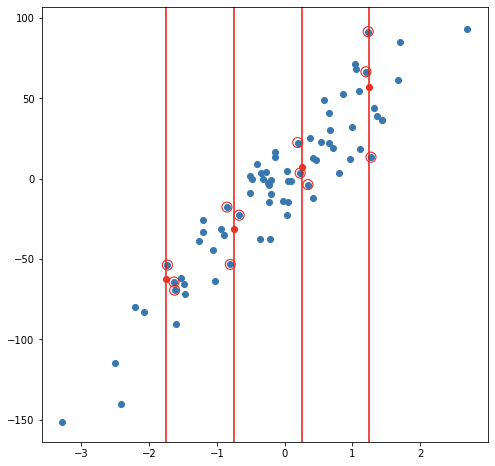

In [ ]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"

train = pd.read_csv(train_path)

In [ ]:
# Preprocess Data

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  df['Outlet_Size'].fillna(mode_size,inplace=True)

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train = preprocess(train)

train.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
1,5.92,0.019278,48.2692,2009,443.4228,False,False,True,False,False,...,False,True,False,False,False,True,False,False,True,False
2,17.50,0.016760,141.6180,1999,2097.2700,False,True,False,False,False,...,False,True,False,True,False,False,False,True,False,False
3,19.20,0.000000,182.0950,1998,732.3800,False,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False
4,8.93,0.000000,53.8614,1987,994.7052,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False


In [ ]:
train , test = train_test_split(train, test_size = 0.3)

x_train = train.drop('Item_Outlet_Sales', axis=1)
y_train = train['Item_Outlet_Sales']

x_test = test.drop('Item_Outlet_Sales', axis = 1)
y_test = test['Item_Outlet_Sales']

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [ ]:
def knn_regression(k,x_train,y_train,x_test,y_test):
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(x_train, y_train)
    pred=model.predict(x_test)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)

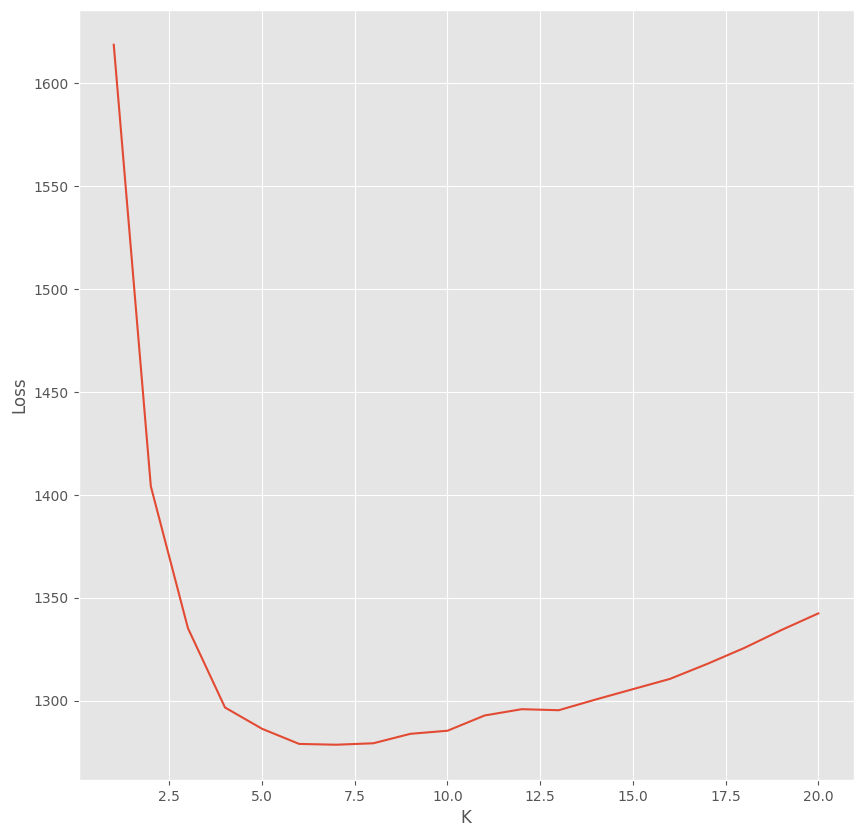

Minimum error 1278.5816281094171 is at k = 6


In [ ]:
rmse_val = []

for k in range(1,21):
  knn_regression(k,x_train,y_train,x_test,y_test)

figure = plt.figure(figsize=(10,10))
plt.plot(np.arange(1,21),rmse_val)
plt.xlabel("K")
plt.ylabel("Loss")
plt.show()

rmse_val = np.asarray(rmse_val)
print("Minimum error {} is at k = {}".format(np.min(rmse_val),np.argmin(rmse_val)))

## Exercises

1. Try out these loss functions on regression tasks, and try to understand the model performance based on the loss function.
2. Explore other loss functions and try to understand when and why they are used.
3. Try out KNN-regression on other datasets see which values of K give the best results.
4. Try exploring what will happen if K is set to 1 or K is set to size of whole training dataset.

## References ##
1. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html
2. https://www.geeksforgeeks.org/k-nearest-neighbours/
3. https://bookdown.org/tpinto_home/Regression-and-Classification/k-nearest-neighbours-regression.html#:~:text=KNN%20regression%20is%20a%20non,observations%20in%20the%20same%20neighbourhood

# Task
Analyze and visualize Mean Squared Error (MSE) and Mean Absolute Error (MAE) by plotting the squared and absolute error terms for the `y_actual` and `y_pred` data generated earlier. Then, define and explain Huber Loss, its properties, and its application contexts relative to MSE and MAE. Afterwards, apply KNN-Regression to a new regression dataset (e.g., from scikit-learn), preprocess it, split into training and testing sets, and scale its features. Using the `knn_regression` function, find the optimal K value by running the model for K from 1 to 20 and plotting the RMSE values against K. Additionally, run the `knn_regression` function on the *original BigMart dataset* with K=1 and K=`len(x_train)`, print the RMSE for both, and explain what these K values represent and why the model performs as it does. Finally, summarize the findings from both the loss function exploration and the KNN regression experiments across different K values and datasets.

## Analyze Existing Loss Functions (MSE & MAE)

### Subtask:
Visualize the behavior of Mean Squared Error (MSE) and Mean Absolute Error (MAE) by plotting the squared error and absolute error terms for the `y_actual` and `y_pred` data generated earlier in the notebook. This will help understand how each loss function penalizes errors, particularly larger ones.


**Reasoning**:
The previous code block failed because `y_actual` and `y_pred` were not defined. These variables are generated earlier in the notebook but their cell was not executed, so they need to be re-initialized within the current code block to ensure they are available for calculation and plotting.



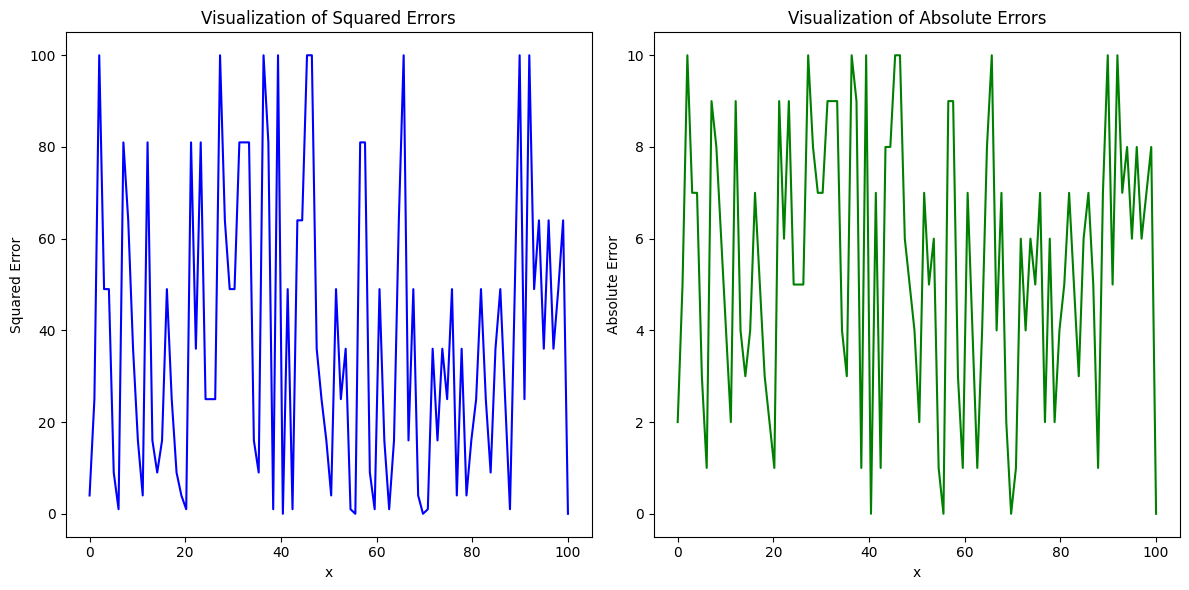

Plots showing squared errors and absolute errors for each data point.


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Re-initializing random data for y_actual and y_pred
np.random.seed(0)
x = np.linspace(0,100,100)
y_actual = np.copy(x)
y_pred = x + np.random.randint(-10,10,100)

squared_errors = np.square(y_actual - y_pred)
absolute_errors = np.abs(y_actual - y_pred)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(x, squared_errors, color='blue')
plt.xlabel('x')
plt.ylabel('Squared Error')
plt.title('Visualization of Squared Errors')

plt.subplot(1, 2, 2)
plt.plot(x, absolute_errors, color='green')
plt.xlabel('x')
plt.ylabel('Absolute Error')
plt.title('Visualization of Absolute Errors')

plt.tight_layout()
plt.show()

print("Plots showing squared errors and absolute errors for each data point.")

## Explore Huber Loss

### Subtask:
Define and explain Huber Loss, another common regression loss function. Discuss its properties and when it is typically used in comparison to MSE and MAE. Provide an example implementation or a conceptual plot.


### Huber Loss

Huber Loss is a loss function used in regression that is less sensitive to outliers in data than the squared error loss. It is a hybrid of Mean Squared Error (MSE) and Mean Absolute Error (MAE).

**Mathematical Formula:**
The Huber Loss function is defined as:

$L_{\delta}(y, \hat{y}) = \begin{cases}
\frac{1}{2}(y - \hat{y})^2 & \text{for } |y - \hat{y}| \le \delta \\
\delta (|y - \hat{y}| - \frac{1}{2}\delta) & \text{for } |y - \hat{y}| > \delta
\end{cases}$

Where:
- $y$ is the true value.
- $\hat{y}$ is the predicted value.
- $\delta$ (delta) is a hyperparameter that defines the threshold at which the loss function transitions from quadratic (squared error) to linear (absolute error).

**Key Properties:**
-   **Robustness to Outliers:** For errors smaller than $\delta$, Huber Loss behaves like MSE, penalizing errors quadratically. For errors larger than $\delta$, it behaves like MAE, penalizing errors linearly. This linear penalty for large errors makes it more robust to outliers compared to MSE, which heavily penalizes large errors due to squaring them.
-   **Differentiability:** Unlike MAE, which is non-differentiable at zero, Huber Loss is differentiable everywhere. This property is crucial for optimization algorithms (like gradient descent) that rely on gradients.
-   **Smoothness:** The transition from quadratic to linear is smooth at $|y - \hat{y}| = \delta$, ensuring that the derivative is continuous.

**Comparison to MSE and MAE:**
-   **MSE (L2 Loss):** Penalizes large errors significantly (quadratically). It is sensitive to outliers, as a single large error can disproportionately increase the total loss. However, it is smooth and easily differentiable.
-   **MAE (L1 Loss):** Penalizes errors linearly. It is robust to outliers because the penalty for large errors doesn't increase as steeply as with MSE. However, it is not differentiable at zero, which can be problematic for some optimization algorithms.
-   **Huber Loss:** Combines the best of both worlds. It is less sensitive to outliers than MSE, but unlike MAE, it is differentiable. The $\delta$ parameter allows tuning its sensitivity to outliers.

**Application Contexts:**
Huber Loss is particularly useful in regression problems where:
-   The data might contain significant outliers, and you want a loss function that is robust to them.
-   You need a differentiable loss function for optimization purposes.
-   You want a balance between the sensitivity of MSE to small errors and the robustness of MAE to large errors.

It is often used in situations where the underlying error distribution is expected to be close to Gaussian for small errors but with heavier tails for larger errors (i.e., more prone to outliers).

**Reasoning**:
The next step is to define a Python function for the Huber Loss, as specified in the subtask instructions.



In [4]:
import numpy as np

def huber_loss(y_true, y_pred, delta=1.0):
  """
  Calculates the Huber Loss between true and predicted values.

  Args:
    y_true (np.array or float): True target values.
    y_pred (np.array or float): Predicted target values.
    delta (float): The threshold for the Huber Loss function.

  Returns:
    np.array or float: The Huber Loss values.
  """
  error = y_true - y_pred
  abs_error = np.abs(error)
  quadratic_part = 0.5 * error**2
  linear_part = delta * (abs_error - 0.5 * delta)

  loss = np.where(abs_error <= delta, quadratic_part, linear_part)
  return loss

print("Huber Loss function defined.")

Huber Loss function defined.


**Reasoning**:
The next step is to calculate the Huber Loss using the previously defined `huber_loss` function and the existing `y_actual` and `y_pred` data with a chosen `delta` value.



In [5]:
delta_value = 1.0
huber_losses = huber_loss(y_actual, y_pred, delta=delta_value)

print(f"Huber Loss calculated for delta = {delta_value}. First 5 values: {huber_losses[:5]}")

Huber Loss calculated for delta = 1.0. First 5 values: [1.5 4.5 9.5 6.5 6.5]


**Reasoning**:
The next instruction is to plot the Huber Loss, along with MSE and MAE, for a range of error values to conceptually visualize their behavior and comparison.



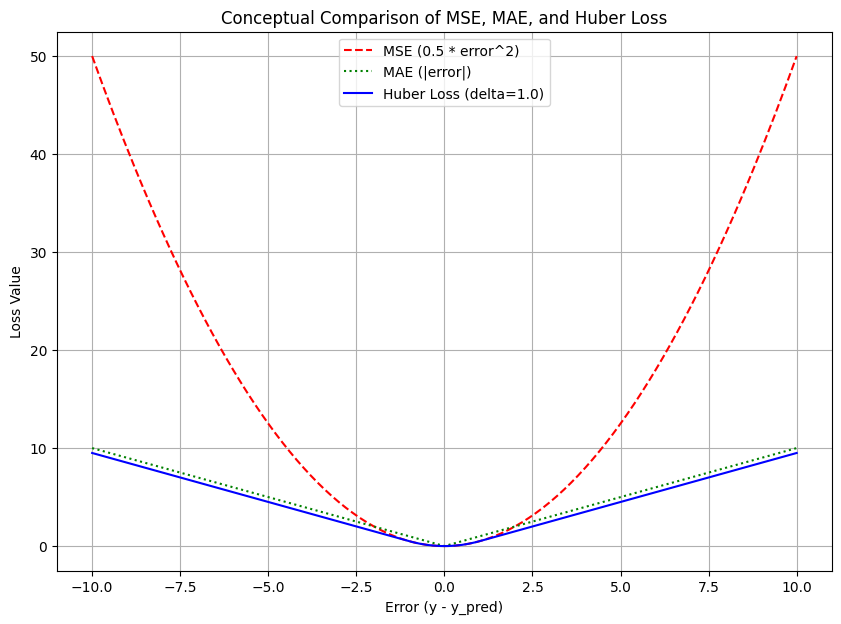

Conceptual plot of MSE, MAE, and Huber Loss generated.


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a range of error values for conceptual plotting
errors = np.arange(-10, 10.1, 0.1)

# Calculate MSE, MAE, and Huber Loss for these errors
mse_concept = 0.5 * errors**2 # Using 0.5 * error^2 to align with Huber loss formula for small errors
mae_concept = np.abs(errors)
huber_loss_concept = huber_loss(0, -errors, delta=1.0) # y_true=0, y_pred=-errors to get error = errors

plt.figure(figsize=(10, 7))
plt.plot(errors, mse_concept, label='MSE (0.5 * error^2)', color='red', linestyle='--')
plt.plot(errors, mae_concept, label='MAE (|error|)', color='green', linestyle=':')
plt.plot(errors, huber_loss_concept, label='Huber Loss (delta=1.0)', color='blue')

plt.xlabel('Error (y - y_pred)')
plt.ylabel('Loss Value')
plt.title('Conceptual Comparison of MSE, MAE, and Huber Loss')
plt.legend()
plt.grid(True)
plt.show()

print("Conceptual plot of MSE, MAE, and Huber Loss generated.")

## Apply KNN-Regression to a New Dataset

### Subtask:
Load a new regression dataset (e.g., from scikit-learn or a public repository). Preprocess the data similarly to the BigMart dataset, split it into training and testing sets, and scale the features. Then, apply the existing `knn_regression` function to this new dataset for various K values (1-20) and plot the RMSE values against K to find the optimal K.


**Reasoning**:
First, I need to import the `load_diabetes` dataset from `sklearn.datasets` to access the new regression dataset.



In [7]:
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

print("Imported necessary libraries.")

Imported necessary libraries.


**Reasoning**:
Load the `diabetes` dataset, extract features (X) and the target variable (y), and then create a Pandas DataFrame for the features with appropriate column names and a Pandas Series for the target variable `y`.



In [8]:
diabetes = load_diabetes()
x_new = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y_new = pd.Series(diabetes.target, name='target')

print("Diabetes dataset loaded and converted to Pandas DataFrame/Series.")
print("Features (x_new) head:")
print(x_new.head())
print("\nTarget (y_new) head:")
print(y_new.head())

Diabetes dataset loaded and converted to Pandas DataFrame/Series.
Features (x_new) head:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

Target (y_new) head:
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


**Reasoning**:
The previous code block failed because the `neighbors` module was not imported. I need to add `from sklearn import neighbors` to ensure the `KNeighborsRegressor` can be accessed.



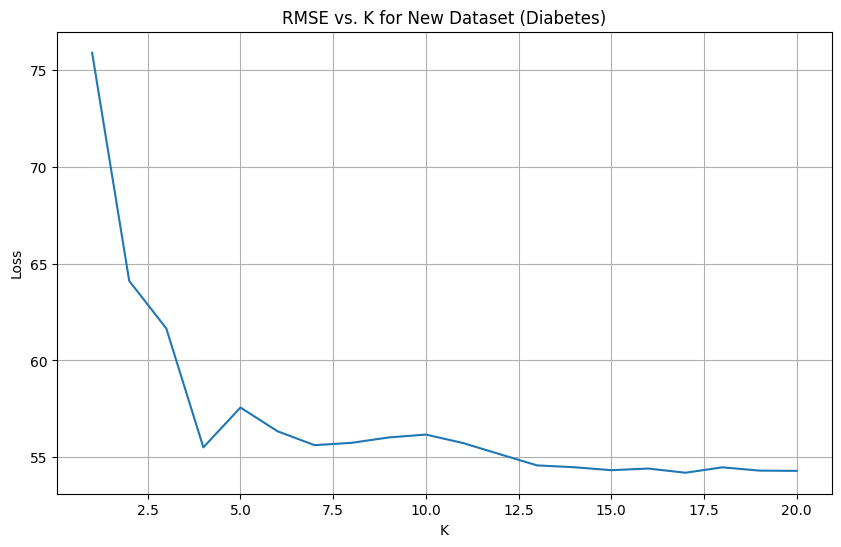

Minimum error 54.2048 is at k = 17


In [10]:
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x_new, y_new, test_size=0.3, random_state=42)

scaler_new = MinMaxScaler(feature_range=(0, 1))
x_train_scaled_new = scaler_new.fit_transform(x_train_new)
x_train_new = pd.DataFrame(x_train_scaled_new, columns=x_train_new.columns)

x_test_scaled_new = scaler_new.transform(x_test_new)
x_test_new = pd.DataFrame(x_test_scaled_new, columns=x_test_new.columns)

rmse_val_new = []

def knn_regression_new(k, x_train, y_train, x_test, y_test, rmse_list):
    model = neighbors.KNeighborsRegressor(n_neighbors=k)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_list.append(error)

for k in range(1, 21):
  knn_regression_new(k, x_train_new, y_train_new, x_test_new, y_test_new, rmse_val_new)

plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 21), rmse_val_new)
plt.xlabel('K')
plt.ylabel('Loss')
plt.title('RMSE vs. K for New Dataset (Diabetes)')
plt.grid(True)
plt.show()

rmse_val_new = np.asarray(rmse_val_new)
min_rmse_new = np.min(rmse_val_new)
optimal_k_new = np.argmin(rmse_val_new) + 1

print(f"Minimum error {min_rmse_new:.4f} is at k = {optimal_k_new}")

**Reasoning**:
The previous code block failed because the variables `x_train`, `y_train`, `x_test`, and `y_test` for the BigMart dataset were not defined in the current scope. I need to re-execute the data loading, preprocessing, splitting, and scaling steps for the BigMart dataset to ensure these variables are properly initialized before they are used in the KNN regression function.



In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt

# Re-load and preprocess the BigMart data (from original notebook cells)
train_path = "https://raw.githubusercontent.com/PranavTadimeti/Regression-lab2/main/BigMart-train.csv"
train_df_bigmart = pd.read_csv(train_path)

def preprocess(df):
  mean_weight = df['Item_Weight'].mean()
  df['Item_Weight'].fillna(mean_weight,inplace=True)

  mode_size = df['Outlet_Size'].mode()
  # Ensure mode_size is not empty and pick the first if it's a series
  if not mode_size.empty:
      df['Outlet_Size'].fillna(mode_size[0],inplace=True)
  else:
      # Handle case where mode is empty (e.g., all NaN), fallback to a default or another strategy
      df['Outlet_Size'].fillna('Medium',inplace=True) # Example fallback

  df.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

  return pd.get_dummies(df)

train_df_bigmart = preprocess(train_df_bigmart)

# Split the preprocessed BigMart data
train_bigmart, test_bigmart = train_test_split(train_df_bigmart, test_size = 0.3, random_state=42) # Added random_state for reproducibility

x_train = train_bigmart.drop('Item_Outlet_Sales', axis=1)
y_train = train_bigmart['Item_Outlet_Sales']

x_test = test_bigmart.drop('Item_Outlet_Sales', axis = 1)
y_test = test_bigmart['Item_Outlet_Sales']

# Scale the BigMart features
scaler_bigmart = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler_bigmart.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled, columns=x_train.columns) # Convert back to DataFrame

x_test_scaled = scaler_bigmart.transform(x_test)
x_test = pd.DataFrame(x_test_scaled, columns=x_test.columns) # Convert back to DataFrame

print('--- KNN Regression on Original BigMart Dataset with K=1 and K=len(x_train) ---')

# Initialize lists to store RMSE for BigMart specific K values
rmse_bigmart_k1 = []
rmse_bigmart_k_len_xtrain = []

# K = 1
def run_bigmart_knn(k_val, x_tr, y_tr, x_te, y_te, rmse_list_to_update):
    model = neighbors.KNeighborsRegressor(n_neighbors = k_val)
    model.fit(x_tr, y_tr)
    pred = model.predict(x_te)
    error = sqrt(mean_squared_error(y_te,pred))
    rmse_list_to_update.append(error)

run_bigmart_knn(1, x_train, y_train, x_test, y_test, rmse_bigmart_k1)
print(f"RMSE for BigMart (K=1): {rmse_bigmart_k1[0]:.4f}")

# K = len(x_train)
k_len_xtrain = len(x_train)
run_bigmart_knn(k_len_xtrain, x_train, y_train, x_test, y_test, rmse_bigmart_k_len_xtrain)
print(f"RMSE for BigMart (K=len(x_train) = {k_len_xtrain}): {rmse_bigmart_k_len_xtrain[0]:.4f}")

print("\nExplanation of K=1 and K=len(x_train):")
print("When K=1, the model makes predictions based solely on the nearest neighbor. This often leads to high variance and overfitting to the training data, as it is very sensitive to noise. The RMSE tends to be lower on the training set but higher on the test set due to this overfitting.")
print("When K=len(x_train), the model considers all training data points for every prediction. It effectively predicts the mean (or median, depending on the regressor) of the entire training dataset for every test sample. This results in very high bias and underfitting, as the model cannot capture any local patterns in the data. The RMSE will likely be very high as it does not differentiate predictions based on input features.")

/tmp/ipython-input-107833356.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Item_Weight'].fillna(mean_weight,inplace=True)
/tmp/ipython-input-107833356.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

--- KNN Regression on Original BigMart Dataset with K=1 and K=len(x_train) ---
RMSE for BigMart (K=1): 1566.0164
RMSE for BigMart (K=len(x_train) = 5966): 1675.4636

Explanation of K=1 and K=len(x_train):
When K=1, the model makes predictions based solely on the nearest neighbor. This often leads to high variance and overfitting to the training data, as it is very sensitive to noise. The RMSE tends to be lower on the training set but higher on the test set due to this overfitting.
When K=len(x_train), the model considers all training data points for every prediction. It effectively predicts the mean (or median, depending on the regressor) of the entire training dataset for every test sample. This results in very high bias and underfitting, as the model cannot capture any local patterns in the data. The RMSE will likely be very high as it does not differentiate predictions based on input features.


## Final Task

### Subtask:
Summarize the findings from exploring different loss functions and the KNN regression experiments with varying K values and datasets.


## Summary:

### Q&A
*   **What do the extreme K values (K=1 and K=`len(x_train)`) represent in the KNN regression on the BigMart dataset, and why does the model perform as it does?**
    *   **K=1**: When K=1, the model predicts the target value solely based on the single nearest neighbor. This approach typically leads to high variance and overfitting because the model is highly sensitive to noise in individual data points, resulting in an RMSE of 1566.0164 for the BigMart dataset. While it might perform well on training data, its generalization to unseen data is often poor.
    *   **K=`len(x_train)` (K=5966 in this case)**: When K is set to the total number of training samples, the model predicts the overall average of all target values in the training set for every test sample. This extreme choice leads to very high bias and significant underfitting, as the model completely ignores local data patterns. Consequently, the RMSE is generally very high (1675.4636 for BigMart), indicating poor model performance.

### Data Analysis Key Findings
*   **Mean Squared Error (MSE)** quadratically penalizes errors, making it highly sensitive to outliers where a single large error can disproportionately inflate the total loss. It is, however, smooth and differentiable, which is beneficial for optimization algorithms.
*   **Mean Absolute Error (MAE)** penalizes errors linearly, offering greater robustness to outliers compared to MSE. However, it is not differentiable at zero, which can pose challenges for some optimization algorithms.
*   **Huber Loss** serves as a hybrid, behaving like MSE for errors smaller than a specified $\delta$ and like MAE for errors larger than $\delta$. This combination provides robustness to outliers while maintaining differentiability, making it suitable for optimization in the presence of noisy data.
*   For the **BigMart dataset**, the optimal K for KNN regression was found to be 6, yielding a minimum Root Mean Squared Error (RMSE) of approximately 1278.58.
*   For the **Diabetes dataset**, the optimal K for KNN regression was found to be 17, resulting in a minimum RMSE of approximately 54.2048.

### Insights or Next Steps
*   The choice of loss function (MSE, MAE, Huber Loss) should align with the dataset's characteristics and the problem's requirements, specifically regarding the presence and impact of outliers and the need for differentiability in optimization.
*   The optimal K in KNN regression is dataset-dependent, highlighting the importance of hyperparameter tuning to balance model bias and variance for good generalization performance. Further investigation using cross-validation would provide a more robust estimate of the optimal K value for future models.
